<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

https://stackoverflow.com/questions/56401123/reading-and-plotting-vtk-file-data-structure-with-python

https://github.com/naucoin/VTKData/tree/master/Data

In [11]:
from vtk import (vtkUnstructuredGridReader, vtkDataSetMapper, vtkActor,
                 vtkRenderer, vtkRenderWindow, vtkRenderWindowInteractor)

#file_name = "mesh_mcve.vtk"  # minimal example vtk file
#file_name = "uGridEx.vtk"
#file_name = "Untitled.vtk"
#file_name = "./VTKData-master/Data/tetraMesh.vtk"
#file_name = "./VTKData-master/Data/tensors.vtk"
#file_name = "./VTKData-master/Data/qualityEx.vtk"
#file_name = "./VTKData-master/Data/hello.vtk"
#file_name = "./VTKData-master/Data/fieldfile.vtk"
file_name = "./VTKData-master/Data/polyEx.vtk"

# Read the source file.
reader = vtkUnstructuredGridReader()
reader.SetFileName(file_name)
reader.Update()  # Needed because of GetScalarRange
output = reader.GetOutput()
output_port = reader.GetOutputPort()
scalar_range = output.GetScalarRange()

# Create the mapper that corresponds the objects of the vtk file
# into graphics elements
mapper = vtkDataSetMapper()
mapper.SetInputConnection(output_port)
mapper.SetScalarRange(scalar_range)

# Create the Actor
actor = vtkActor()
actor.SetMapper(mapper)

# Create the Renderer
renderer = vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1) # Set background to white

# Create the RendererWindow
renderer_window = vtkRenderWindow()
renderer_window.AddRenderer(renderer)

# Create the RendererWindowInteractor and display the vtk_file
interactor = vtkRenderWindowInteractor()
interactor.SetRenderWindow(renderer_window)
interactor.Initialize()
interactor.Start()

ERROR:root:Cannot read dataset type: polydata


/home/iu/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


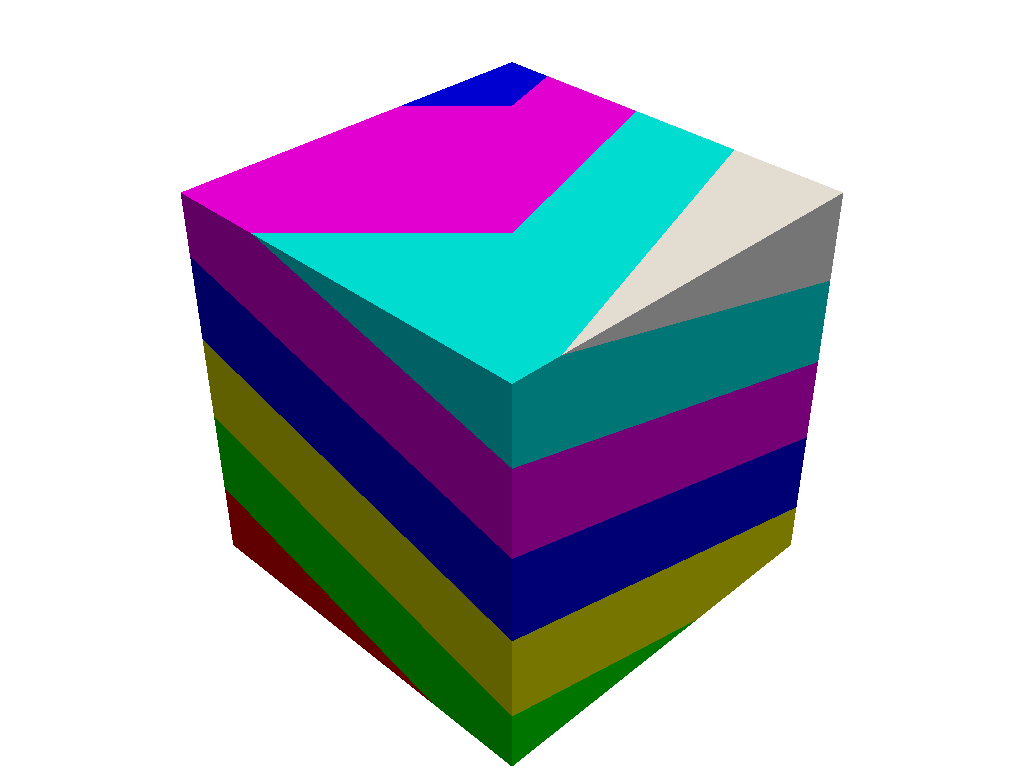

In [19]:
import pyvista as pv

# read the data

file_name = "./VTKData-master/Data/polyEx.vtk"

grid = pv.read(file_name)

# plot the data with an automatically created Plotter
grid.plot(show_scalar_bar=False, show_axes=False)

/home/iu/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/iu/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


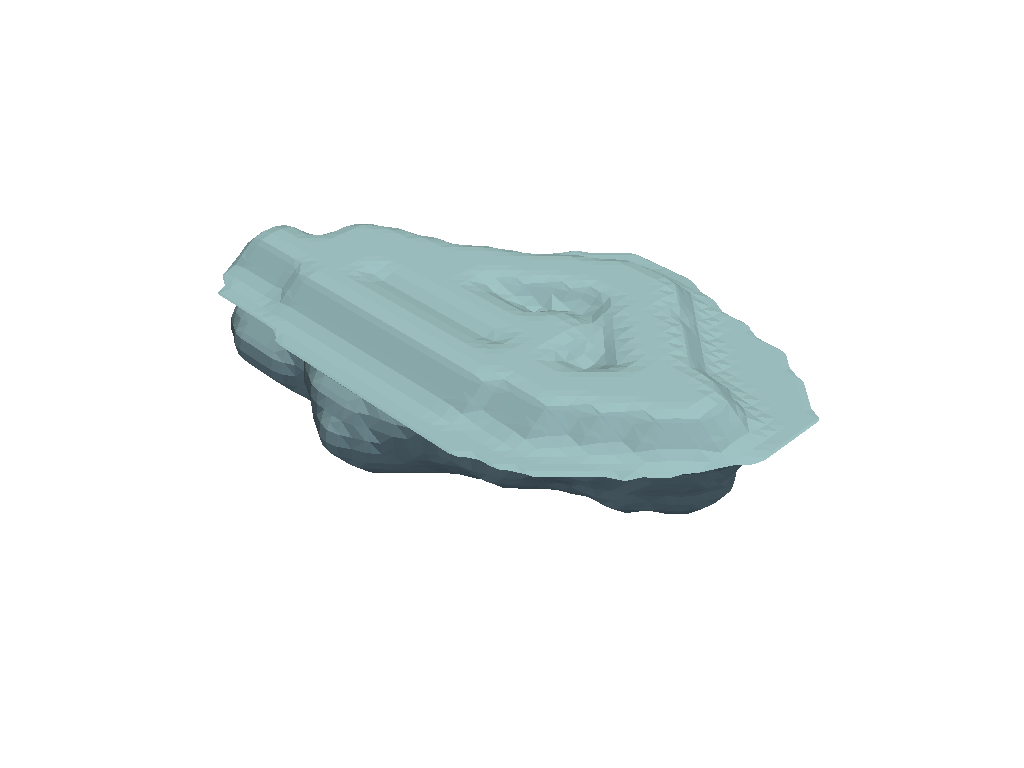

In [1]:
import pyvista as pv

# read the data

file_name = "./Untitled.vtk"

grid = pv.read(file_name)

# plot the data with an automatically created Plotter
grid.plot(show_scalar_bar=True, show_axes=False)

In [1]:
from mayavi import mlab
from mayavi.modules.surface import Surface

#file_name = "./Untitled.vtk"
file_name = "./VTKData-master/Data/polyEx.vtk"
#file_name = "mesh_mcve.vtk"  # minimal example vtk file

# create a new figure, grab the engine that's created with it
fig = mlab.figure()
engine = mlab.get_engine()

# open the vtk file, let mayavi figure it all out
vtk_file_reader = engine.open(file_name)

# plot surface corresponding to the data
surface = Surface()
engine.add_filter(surface, vtk_file_reader)

# block until figure is closed
mlab.show()

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



Cannot contour: No scalars in input data!
Cannot contour: No scalars in input data!


In [6]:
from mayavi import mlab
from mayavi.modules.surface import Surface

file_name = "./Untitled.vtk"
#file_name = "mesh_mcve.vtk"  # minimal example vtk file

# create a new figure, grab the engine that's created with it
fig = mlab.figure()
engine = mlab.get_engine()

# open the vtk file, let mayavi figure it all out
vtk_file_reader = engine.open(file_name)

# plot surface corresponding to the data
surface = Surface()
engine.add_filter(surface, vtk_file_reader)

# block until figure is closed
mlab.show()

In [2]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

In [1]:
import numpy as np

x = [1, 2, 3, 4, 5, 6]
y = [0, 0, 0, 0, 0, 0]
z = y

s = [.5, .6, .7, .8, .9, 1]

from mayavi import mlab
pts = mlab.points3d(x, y, z, s)

pts = mlab.points3d(x, y, z, s, scale_factor=1)

#pts.glyph.glyph.clamping = False

x, y, z, s, c = np.random.random((5, 10))
pts = mlab.quiver3d(x, y, z, s, s, s, scalars=c, mode='sphere')
pts.glyph.color_mode = 'color_by_scalar'
# Finally, center the glyphs on the data point
pts.glyph.glyph_source.glyph_source.center = [0, 0, 0]



********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [1]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008, Enthought, Inc.
# License: BSD Style.

from mayavi import mlab

# To access any VTK object, we use 'tvtk', which is a Python wrapping of
# VTK replacing C++ setters and getters by Python properties and
# converting numpy arrays to VTK arrays when setting data.
from tvtk.api import tvtk
from tvtk.common import configure_input_data

v = mlab.figure()

# Create a first sphere
# The source generates data points
sphere = tvtk.SphereSource(center=(0, 0, 0), radius=0.5)
# The mapper converts them into position in, 3D with optionally color (if
# scalar information is available).
sphere_mapper = tvtk.PolyDataMapper()
configure_input_data(sphere_mapper, sphere.output)
sphere.update()

# The Property will give the parameters of the material.
p = tvtk.Property(opacity=0.2, color=(1, 0, 0))
# The actor is the actually object in the scene.
sphere_actor = tvtk.Actor(mapper=sphere_mapper, property=p)
v.scene.add_actor(sphere_actor)

# Create a second sphere
sphere2 = tvtk.SphereSource(center=(7, 0, 1), radius=0.2)
sphere_mapper2 = tvtk.PolyDataMapper()
configure_input_data(sphere_mapper2, sphere2.output)
sphere2.update()
p = tvtk.Property(opacity=0.3, color=(1, 0, 0))
sphere_actor2 = tvtk.Actor(mapper=sphere_mapper2, property=p)
v.scene.add_actor(sphere_actor2)

# Create a line between the two spheres
line = tvtk.LineSource(point1=(0, 0, 0), point2=(7, 0, 1))
line_mapper = tvtk.PolyDataMapper()
configure_input_data(line_mapper, line.output)
line.update()
line_actor = tvtk.Actor(mapper=line_mapper)
v.scene.add_actor(line_actor)

# And display text
vtext = tvtk.VectorText()
vtext.text = 'Mayavi'
text_mapper = tvtk.PolyDataMapper()
configure_input_data(text_mapper, vtext.get_output())
vtext.update()
p2 = tvtk.Property(color=(0, 0.3, 0.3))
text_actor = tvtk.Follower(mapper=text_mapper, property=p2)
text_actor.position = (0, 0, 0)
v.scene.add_actor(text_actor)

# Choose a view angle, and display the figure
mlab.view(85, -17, 15, [3.5, -0.3, -0.8])
mlab.show()

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

